# load dataset

In [3]:
import pandas as pd
df1 = pd.read_csv("student-scores.csv")
df = df1.copy()
df.head()

id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

# drop irrelevant columns

In [4]:
df.columns
df.drop(columns=['id','first_name','last_name','email'],axis=1, inplace=True)

# create new features from all score

In [5]:
df["total_score"] = df["math_score"] + df["history_score"] + df["physics_score"] + df["chemistry_score"] + df["biology_score"] + df["english_score"] + df["geography_score"]
df["average_score"] = df["total_score"] / 7
df.head()

gender  part_time_job  absence_days  extracurricular_activities  \
0    male          False             3                       False   
1  female          False             2                       False   
2  female          False             9                        True   
3  female          False             5                       False   
4    male          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  total_score  average_score  
0               87          574      82.000000  
1               90          640      91.428571  
2               94          605      86.428571  
3               86          551      78.714286  
4               76          521      74.428571

In [6]:
df.head()

gender  part_time_job  absence_days  extracurricular_activities  \
0    male          False             3                       False   
1  female          False             2                       False   
2  female          False             9                        True   
3  female          False             5                       False   
4    male          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  total_score  average_score  
0               87          574      82.000000  
1               90          640      91.428571  
2               94          605      86.428571  
3               86          551      78.714286  
4               76          521      74.428571

# Encoding Categorical Columns

In [7]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# label_encoder = LabelEncoder()

# # Encode categorical columns using label encoder
# df['gender'] = label_encoder.fit_transform(df['gender'])
# df['part_time_job'] = label_encoder.fit_transform(df['part_time_job'])
# df['extracurricular_activities'] = label_encoder.fit_transform(df['extracurricular_activities'])
# df['career_aspiration'] = label_encoder.fit_transform(df['career_aspiration'])
# Define mapping dictionaries for categorical features
gender_map = {'male': 0, 'female': 1}
part_time_job_map = {False: 0, True: 1}
extracurricular_activities_map = {False: 0, True: 1}
career_aspiration_map = {
        'Lawyer': 0, 'Doctor': 1, 'Government Officer': 2, 'Artist': 3, 'Unknown': 4,
        'Software Engineer': 5, 'Teacher': 6, 'Business Owner': 7, 'Scientist': 8,
        'Banker': 9, 'Writer': 10, 'Accountant': 11, 'Designer': 12,
        'Construction Engineer': 13, 'Game Developer': 14, 'Stock Investor': 15,
        'Real Estate Developer': 16
    }
# Apply mapping to the DataFrame
df['gender'] = df['gender'].map(gender_map)
df['part_time_job'] = df['part_time_job'].map(part_time_job_map)
df['extracurricular_activities'] = df['extracurricular_activities'].map(extracurricular_activities_map)
df['career_aspiration'] = df['career_aspiration'].map(career_aspiration_map)

In [8]:
df.head()

gender  part_time_job  absence_days  extracurricular_activities  \
0       0              0             3                           0   
1       1              0             2                           0   
2       1              0             9                           1   
3       1              0             5                           0   
4       0              0             5                           0   

   weekly_self_study_hours  career_aspiration  math_score  history_score  \
0                       27                  0          73             81   
1                       47                  1          90             86   
2                       13                  2          81             97   
3                        3                  3          71             74   
4                       10                  4          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  total_score  average_score  
0               87          574      82.000000  
1               90          640      91.428571  
2               94          605      86.428571  
3               86          551      78.714286  
4               76          521      74.428571

# Balance Dataset

In [9]:
df['career_aspiration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [10]:
df['career_aspiration'].value_counts()

career_aspiration
5     315
7     309
4     223
9     169
0     138
11    126
1     119
16     83
15     73
13     68
3      67
14     63
2      61
6      59
12     56
8      39
10     32
Name: count, dtype: int64

In [13]:
!pip install imbalanced-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Separate features and target variable
X = df.drop('career_aspiration', axis=1)
y = df['career_aspiration']

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='total_score'>

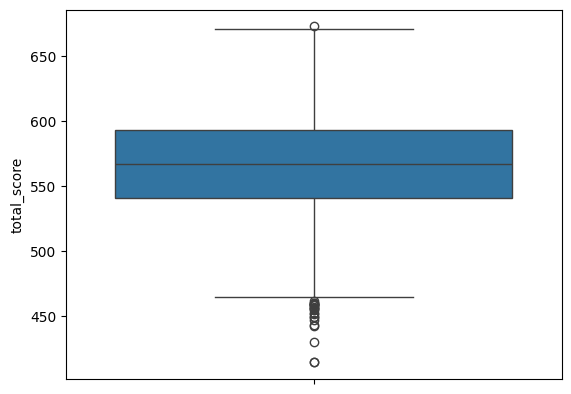

In [25]:
sns.boxplot(df.total_score)

In [27]:
import numpy as np
from scipy.stats import zscore
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

<Axes: ylabel='total_score'>

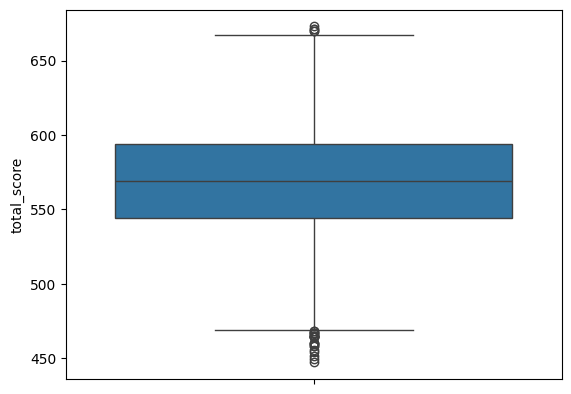

In [28]:
sns.boxplot(df.total_score)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

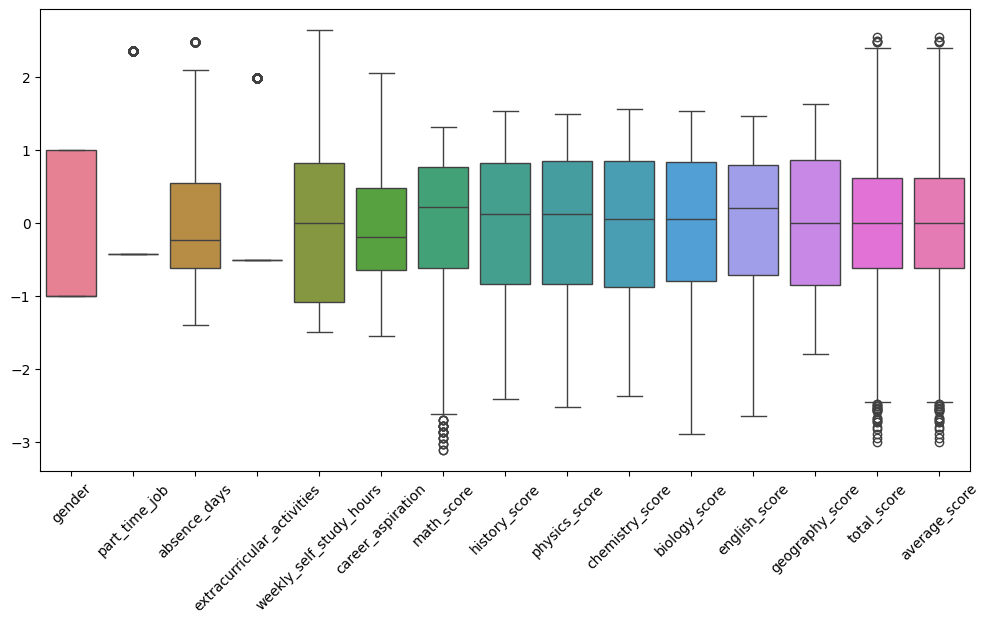

In [32]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
sns.boxplot(data=df)  

plt.xticks(rotation=45) 


plt.show()

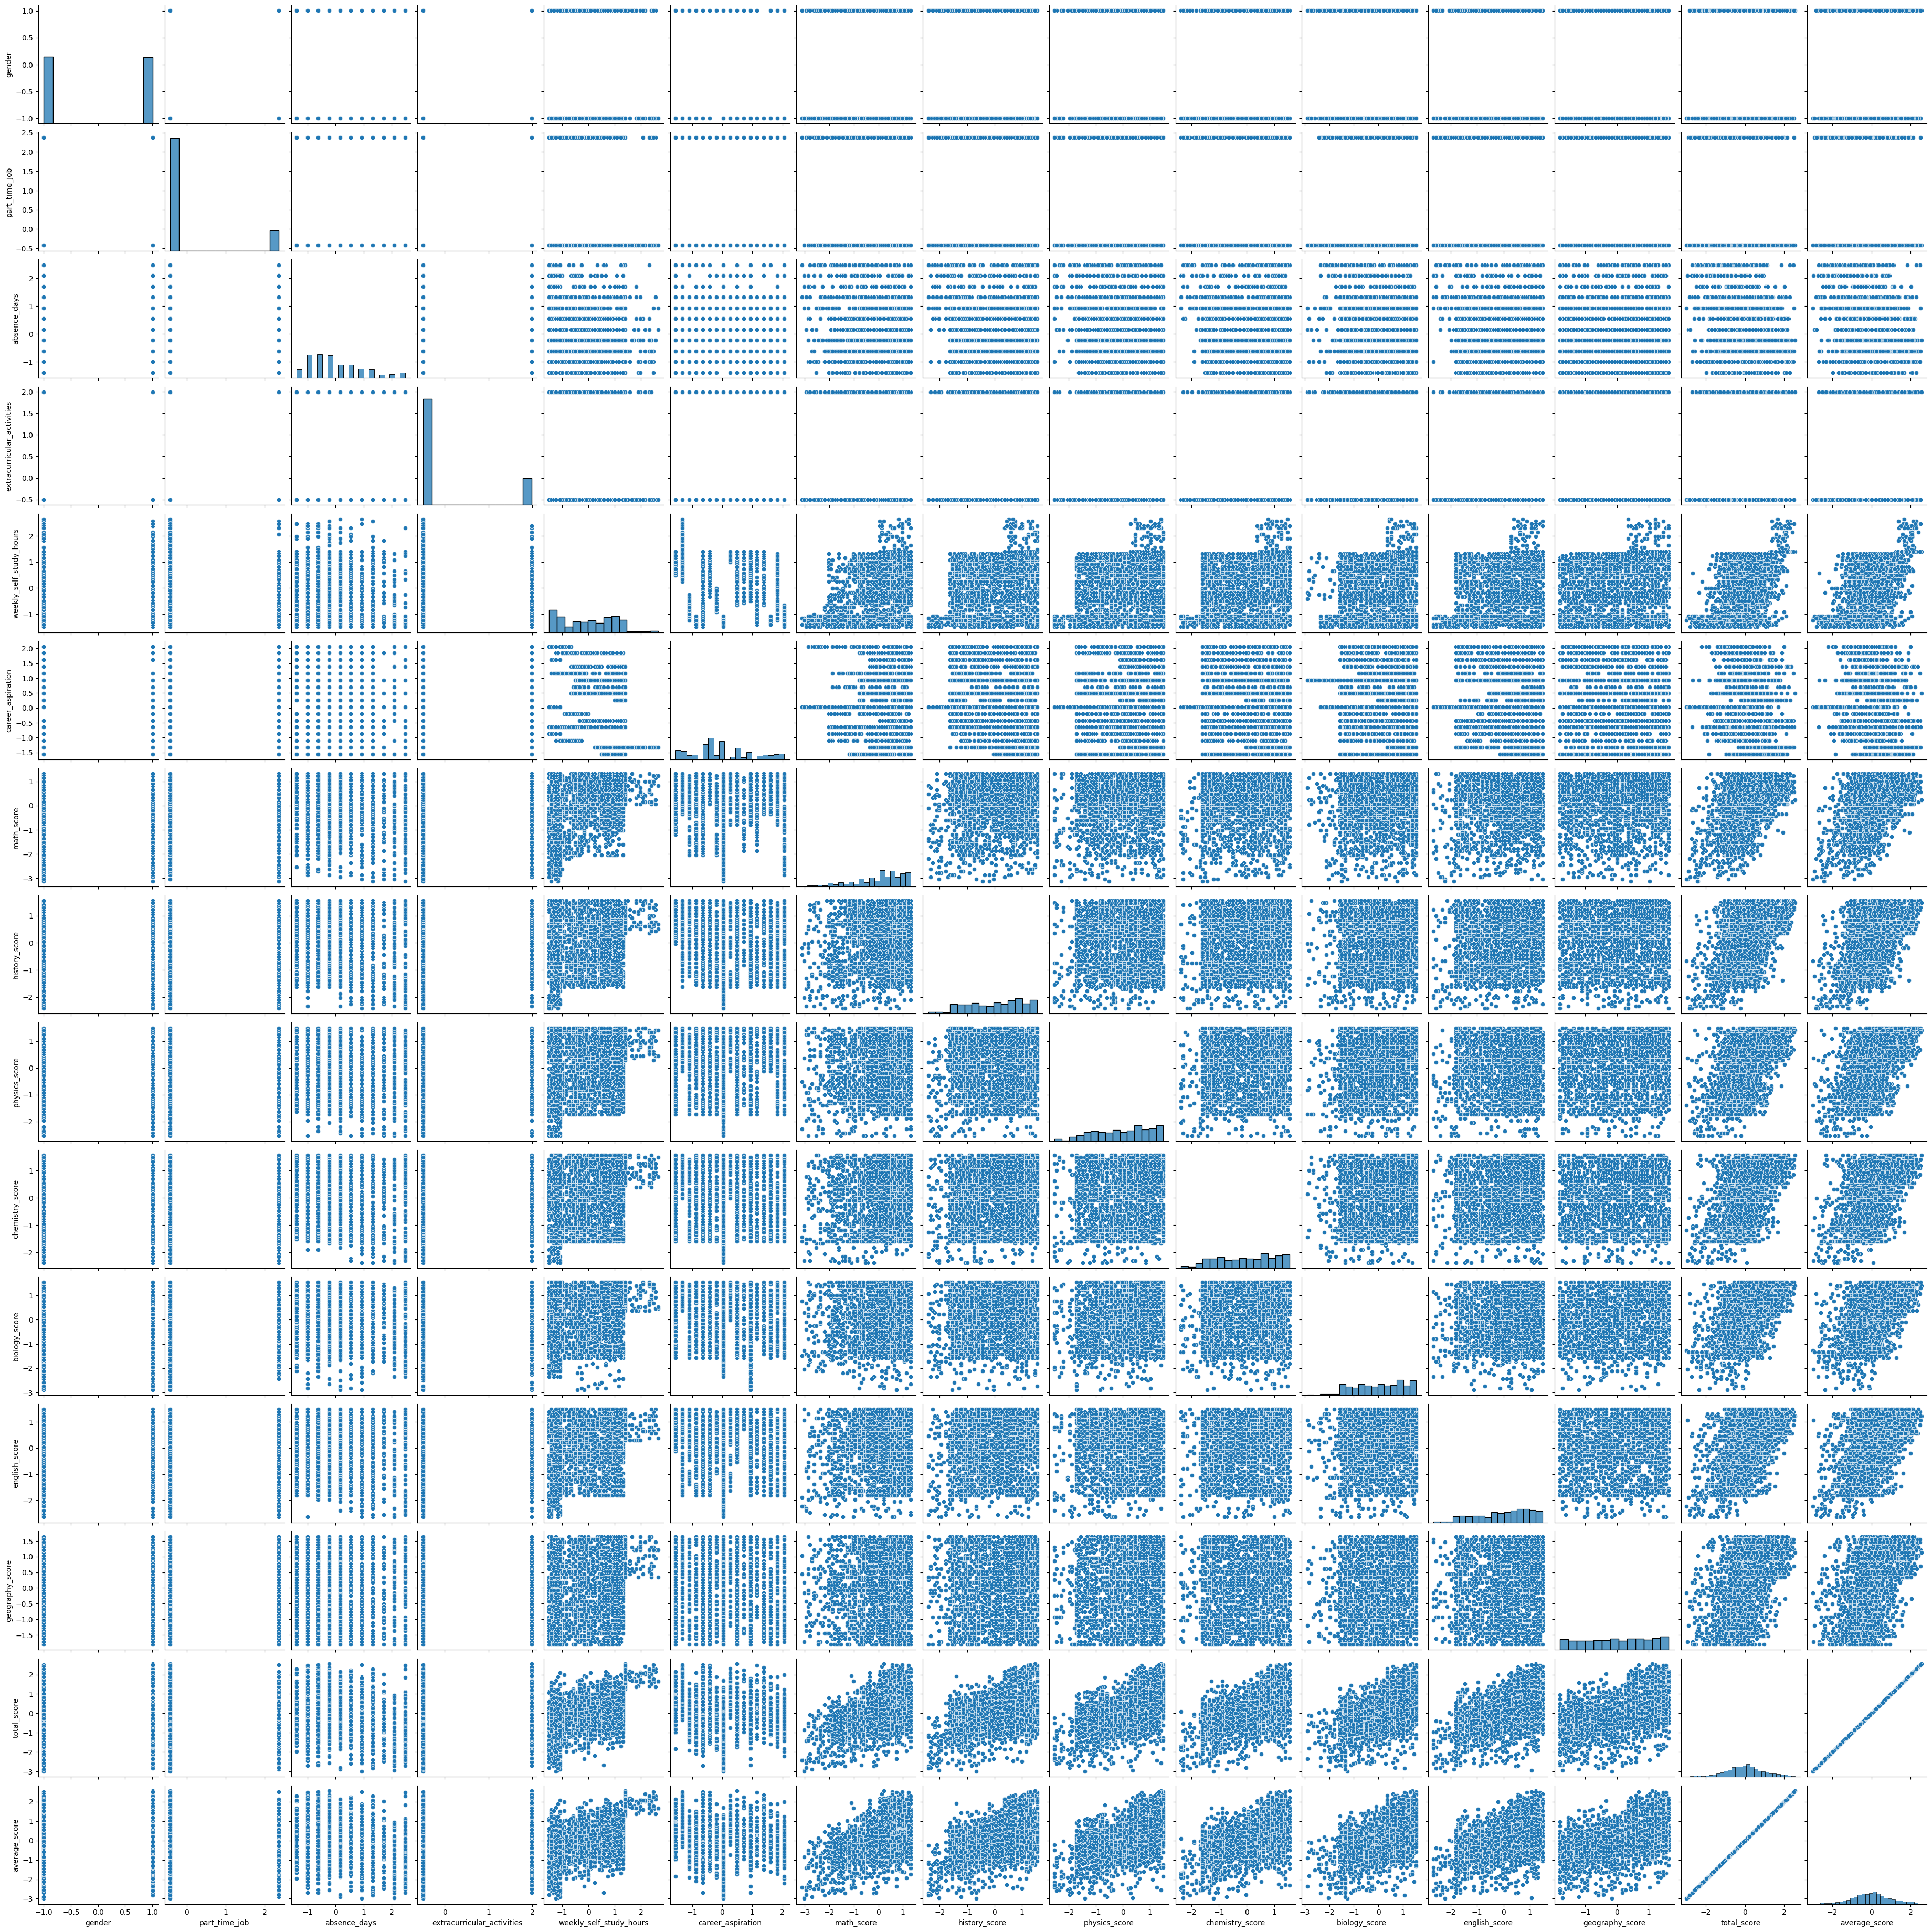

In [33]:
sns.pairplot(df)

<Axes: >

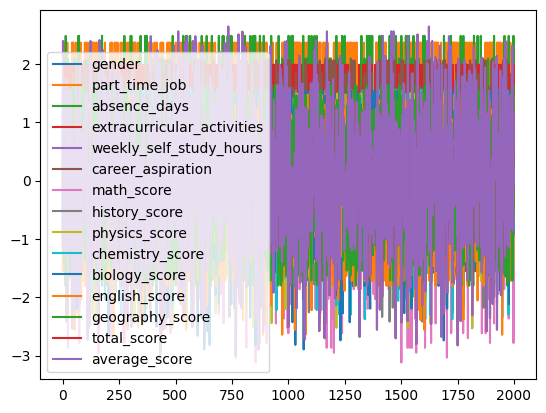

In [34]:
df.plot()

<Axes: ylabel='Count'>

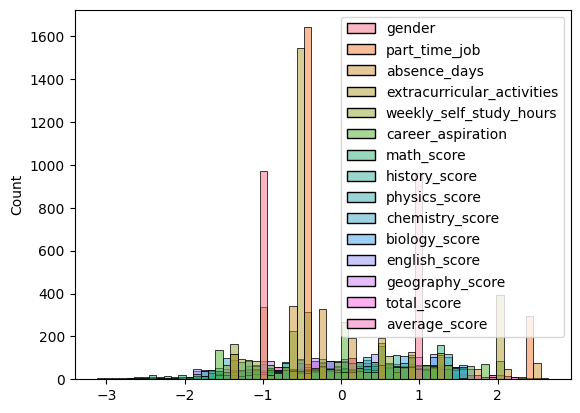

In [35]:
sns.histplot(df)

<Axes: >

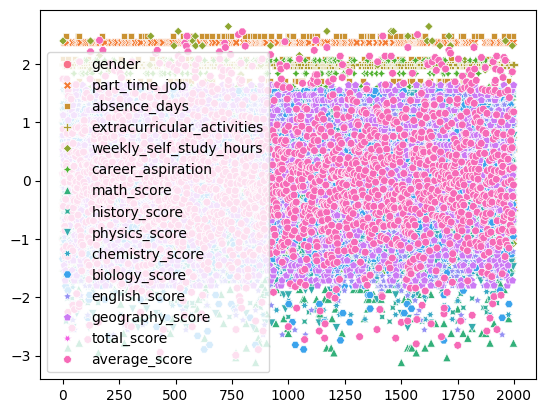

In [36]:
sns.scatterplot(df)

In [37]:
df.head()

gender  part_time_job  absence_days  extracurricular_activities  \
0 -0.996389      -0.422423     -0.228427                   -0.503228   
1  1.003624      -0.422423     -0.615813                   -0.503228   
2  1.003624      -0.422423      2.095886                    1.987171   
3  1.003624      -0.422423      0.546344                   -0.503228   
4 -0.996389      -0.422423      0.546344                   -0.503228   

   weekly_self_study_hours  career_aspiration  math_score  history_score  \
0                 0.741340          -1.550580   -0.943041       0.040428   
1                 2.396077          -1.324768    0.478977       0.436717   
2                -0.416977          -1.098955   -0.273856       1.308555   
3                -1.244346          -0.873142   -1.110337      -0.514378   
4                -0.665187          -0.647330   -0.022911      -0.276604   

   physics_score  chemistry_score  biology_score  english_score  \
0       0.931445         1.324796      -1.339488      -0.123819   
1       1.172486         1.561069       0.759476       0.547770   
2       1.092139         1.246038      -1.184009      -0.375665   
3       0.529710        -0.014083       0.681736      -1.550945   
4      -1.318274        -1.195446      -0.017918      -0.627510   

   geography_score  total_score  average_score  
0         0.520726     0.122941       0.122941  
1         0.778425     1.743590       1.743590  
2         1.122025     0.884155       0.884155  
3         0.434826    -0.441830      -0.441830  
4        -0.424172    -1.178489      -1.178489

In [38]:
df.corr()

gender  part_time_job  absence_days  \
gender                      1.000000       0.026037      0.028254   
part_time_job               0.026037       1.000000      0.187225   
absence_days                0.028254       0.187225      1.000000   
extracurricular_activities  0.010830      -0.015100      0.023155   
weekly_self_study_hours    -0.076397      -0.198208     -0.263902   
career_aspiration          -0.041421       0.012393      0.011624   
math_score                 -0.048939      -0.137149     -0.167455   
history_score               0.022996      -0.105988     -0.125019   
physics_score              -0.050457      -0.124447     -0.137509   
chemistry_score             0.030822      -0.080776     -0.069707   
biology_score              -0.016889      -0.007345     -0.092073   
english_score               0.037151      -0.093333     -0.073174   
geography_score             0.010724      -0.040476     -0.009772   
total_score                -0.004455      -0.177505     -0.204928   
average_score              -0.004455      -0.177505     -0.204928   

                            extracurricular_activities  \
gender                                        0.010830   
part_time_job                                -0.015100   
absence_days                                  0.023155   
extracurricular_activities                    1.000000   
weekly_self_study_hours                      -0.043825   
career_aspiration                             0.032589   
math_score                                   -0.030047   
history_score                                 0.024731   
physics_score                                -0.008090   
chemistry_score                              -0.002424   
biology_score                                -0.017321   
english_score                                -0.002453   
geography_score                              -0.046959   
total_score                                  -0.023999   
average_score                                -0.023999   

                            weekly_self_study_hours  career_aspiration  \
gender                                    -0.076397          -0.041421   
part_time_job                             -0.198208           0.012393   
absence_days                              -0.263902           0.011624   
extracurricular_activities                -0.043825           0.032589   
weekly_self_study_hours                    1.000000          -0.297932   
career_aspiration                         -0.297932           1.000000   
math_score                                 0.354469          -0.043980   
history_score                              0.274781          -0.147070   
physics_score                              0.204575           0.023057   
chemistry_score                            0.190872          -0.072083   
biology_score                              0.209917          -0.115620   
english_score                              0.241050          -0.111139   
geography_score                            0.162401          -0.048298   
total_score                                0.494457          -0.156738   
average_score                              0.494457          -0.156738   

                            math_score  history_score  physics_score  \
gender                       -0.048939       0.022996      -0.050457   
part_time_job                -0.137149      -0.105988      -0.124447   
absence_days                 -0.167455      -0.125019      -0.137509   
extracurricular_activities   -0.030047       0.024731      -0.008090   
weekly_self_study_hours       0.354469       0.274781       0.204575   
career_aspiration            -0.043980      -0.147070       0.023057   
math_score                    1.000000       0.137602       0.114290   
history_score                 0.137602       1.000000       0.054825   
physics_score                 0.114290       0.054825       1.000000   
chemistry_score               0.098949       0.113167       0.121340   
biology_score      

<Axes: >

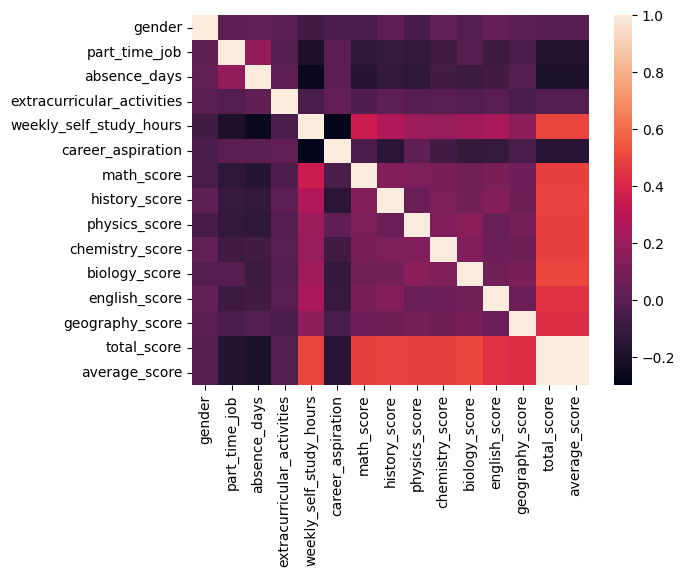

In [40]:
sns.heatmap(df.corr())

<Axes: >

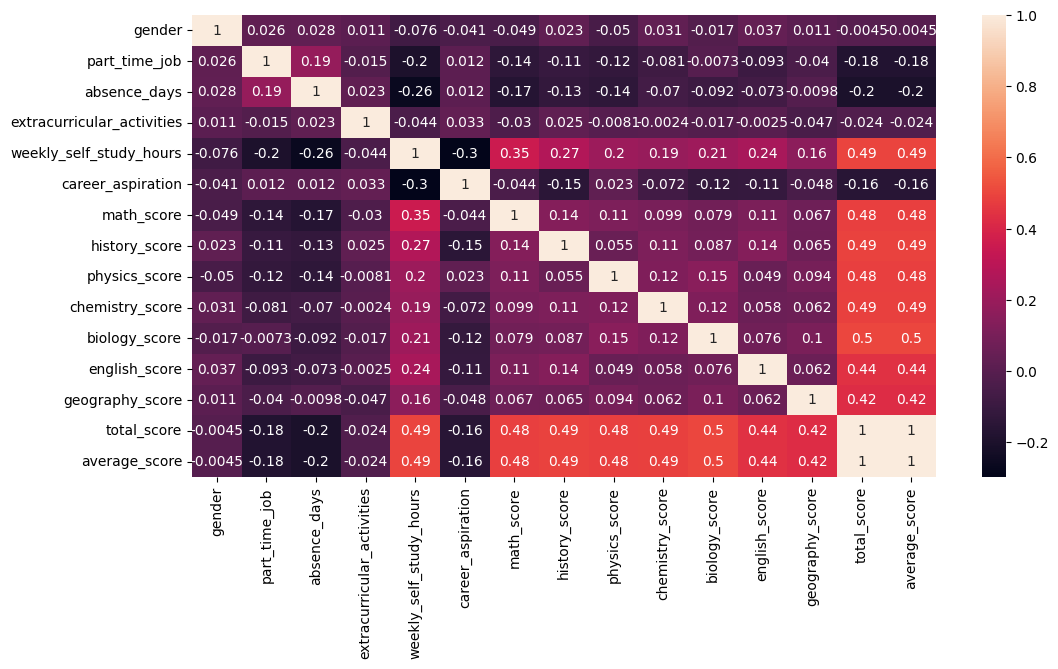

In [43]:
plt.rcParams['figure.figsize']=12,6
sns.heatmap(df.corr(),annot=True)

# Train test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [45]:
X_train.shape

(4284, 14)

# Feature Scalling

In [46]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled.shape

(4284, 14)

# Model Selection (Random Forest)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Report: ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

Accuracy:  0.8263305322128851
Report:                precision    recall  f1-score   support

           0       0.73      0.82      0.77        68
           1       0.82      1.00      0.90        72
           2       0.74      0.98      0.84        57
           3       0.87      0.95      0.91        58
           4       0.81      0.39      0.53        66
           5       0.56      0.36      0.44        76
           6       0.93      0.99      0.96        71
           7       0.97      0.93      0.95        61
           8       0.75      0.98      0.85        53
           9       0.72      0.70      0.71        61
          10       0.90      1.00      0.95        63
          11       0.95      0.72      0.82        53
          12       0.91      0.85      0.88        68
          13       0.76      0.93      0.84        55
          14       0.86      0.98      0.92        57
          15       0.85      0.79      0.82        63
          16       0.93      0.80      0.8

# Single Input Predictions

In [52]:
# test 1
print("Actual Label :", y_test.iloc[10])
print("Model Prediction :",model.predict(X_test_scaled[10].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 12
Model Prediction : 12
Wow! Model doing well.....


In [53]:
# test 2
print("Actual Label :", y_test.iloc[300])
print("Model Prediction :",model.predict(X_test_scaled[300].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 0
Model Prediction : 0
Wow! Model doing well.....


In [54]:
# test 2
print("Actual Label :", y_test.iloc[23])
print("Model Prediction :",model.predict(X_test_scaled[23].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 3
Model Prediction : 3
Wow! Model doing well.....


# Recommendation System

In [55]:

import numpy as np

class_names = ['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
               'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
               'Banker', 'Writer', 'Accountant', 'Designer',
               'Construction Engineer', 'Game Developer', 'Stock Investor',
               'Real Estate Developer']

def Recommendations(gender, part_time_job, absence_days, extracurricular_activities,
                    weekly_self_study_hours, math_score, history_score, physics_score,
                    chemistry_score, biology_score, english_score, geography_score,
                    total_score,average_score):
    
    # Encode categorical variables
    gender_encoded = 1 if gender.lower() == 'female' else 0
    part_time_job_encoded = 1 if part_time_job else 0
    extracurricular_activities_encoded = 1 if extracurricular_activities else 0
    
    # Create feature array
    feature_array = np.array([[gender_encoded, part_time_job_encoded, absence_days, extracurricular_activities_encoded,
                               weekly_self_study_hours, math_score, history_score, physics_score,
                               chemistry_score, biology_score, english_score, geography_score,total_score,average_score]])
    
    # Scale features
    scaled_features = scaler.transform(feature_array)
    
    # Predict using the model
    probabilities = model.predict_proba(scaled_features)
    
    # Get top five predicted classes along with their probabilities
    top_classes_idx = np.argsort(-probabilities[0])[:5]
    top_classes_names_probs = [(class_names[idx], probabilities[0][idx]) for idx in top_classes_idx]
    
    return top_classes_names_probs

In [56]:
# Example usage 1
final_recommendations = Recommendations(gender='female',
                                        part_time_job=False,
                                        absence_days=2,
                                        extracurricular_activities=False,
                                        weekly_self_study_hours=7,
                                        math_score=65,
                                        history_score=60,
                                        physics_score=97,
                                        chemistry_score=94,
                                        biology_score=71,
                                        english_score=81,
                                        geography_score=66,
                                        total_score=534,
                                        average_score=76.285714)

print("Top recommended studies with probabilities:")
print("="*50)
for class_name, probability in final_recommendations:
    print(f"{class_name} with probability {probability}")

Top recommended studies with probabilities:
Teacher with probability 0.72
Government Officer with probability 0.1
Unknown with probability 0.09
Real Estate Developer with probability 0.04
Business Owner with probability 0.02


C:\Users\shaik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
# Example usage 2
final_recommendations = Recommendations(gender='female',
                                        part_time_job=False,
                                        absence_days=2,
                                        extracurricular_activities=False,
                                        weekly_self_study_hours=4,
                                        math_score=87,
                                        history_score=73,
                                        physics_score=98,
                                        chemistry_score=91,
                                        biology_score=79,
                                        english_score=60,
                                        geography_score=77,
                                        total_score=583,
                                        average_score=83.285714)

print("Top recommended studies with probabilities:")
print("="*50)
for class_name, probability in final_recommendations:
    print(f"{class_name} with probability {probability}")


Top recommended studies with probabilities:
Artist with probability 0.62
Game Developer with probability 0.21
Real Estate Developer with probability 0.09
Designer with probability 0.02
Construction Engineer with probability 0.02


C:\Users\shaik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
